In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Track data loading
import psutil
import time

# Save&Load results
import pickle

In [2]:
import networkx as nx

import pandas as pd
import seaborn as sns

# 1. Load Data

In [3]:
st = time.time()

with open("Graphs/G_filtered.gpickle", 'rb') as f:
    G_filtered = pickle.load(f)

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Execution time: 1.5365636110305787 mins
RAM memory % used: 63.7
RAM Used (GB): 254.00070144


# 2. Edge Categorising - Generalisation

In [4]:
newsCategory_dict = nx.get_edge_attributes(G_filtered, 'newsCategories')

In [5]:
newsCategory = ['CLICKBAIT', 'CONSPIRACY/JUNKSCI', 'FAKE/HOAX', 'MSM', 'NA', 'OTHER', 'POLITICAL', 'SATIRE', 'SCIENCE', 'SHADOW']
newsCateogry_dict_decode = {i:newsCategory[i] for i in range(len(newsCategory))}

- scientific

In [6]:
newsCategory[3], newsCategory[8]

('MSM', 'SCIENCE')

- fake

In [7]:
newsCategory[0], newsCategory[1], newsCategory[2]

('CLICKBAIT', 'CONSPIRACY/JUNKSCI', 'FAKE/HOAX')

- uncertain

In [8]:
newsCategory[4], newsCategory[5], newsCategory[6], newsCategory[7], newsCategory[9]

('NA', 'OTHER', 'POLITICAL', 'SATIRE', 'SHADOW')

In [9]:
newsCateogry_dict_generalised_code = {3: 0,  # sciInfo
                                      8: 0,
                                      0: 1,  # misInfo
                                      1: 1,
                                      2: 1,
                                      4: 2,  # undecidedInfo
                                      5: 2,
                                      6: 2, 
                                      7: 2,
                                      9: 2,
                                     }

In [10]:
st = time.time()

newsCategory_dict_generalised = {}

for k,v in newsCategory_dict.items():
    generalised_v = np.array([newsCateogry_dict_generalised_code[element] for element in v])
    newsCategory_dict_generalised.update({k: generalised_v})

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Execution time: 0.2076522668202718 mins
RAM memory % used: 63.8
RAM Used (GB): 254.247313408


In [11]:
nx.set_edge_attributes(G_filtered, newsCategory_dict_generalised, "newsCategoriesGeneralised")

In [12]:
G_filtered.edges[(2, 1480708)] # example

{'weight': 5,
 'timeStamps': array([1663896188, 1664904542, 1664904658, 1670264155, 1670264298]),
 'newsCategories': array([4, 3, 8, 8, 4]),
 'newsCategoriesGeneralised': array([2, 0, 0, 0, 2])}

In [13]:
save_address = "Graphs/G_aggregated_filtered.gpickle"
with open(save_address, 'wb') as pickle_file:
    pickle.dump(G_filtered, pickle_file)

## 2.1. Percentage of scientific, fake, uncertain retweets

In [14]:
all_newsCategoriesGeneralised = np.concatenate(np.array(list(newsCategory_dict_generalised.values())), axis = None)

In [15]:
len(all_newsCategoriesGeneralised)

29991328

- scientific

In [16]:
np.sum(all_newsCategoriesGeneralised == 0), np.sum(all_newsCategoriesGeneralised == 0)/len(all_newsCategoriesGeneralised)

(10762460, 0.3588523989334517)

- fake

In [17]:
np.sum(all_newsCategoriesGeneralised == 1), np.sum(all_newsCategoriesGeneralised == 1)/len(all_newsCategoriesGeneralised)

(2367410, 0.0789364845731406)

- uncertain

In [18]:
np.sum(all_newsCategoriesGeneralised == 2), np.sum(all_newsCategoriesGeneralised == 2)/len(all_newsCategoriesGeneralised)

(16861458, 0.5622111164934077)

# 3. Node Categorising

- Scientific, fake, and uncertain news per user creates/consumes

In [19]:
node_newsCategoriesGeneralised = {}

In [20]:
st = time.time()

for node in list(G_filtered.nodes):
    in_newsCategoriesGeneralised = np.array([])
    out_newsCategoriesGeneralised = np.array([])
    
    for edge in list(G_filtered.in_edges(node)):
        in_newsCategoriesGeneralised = np.concatenate((in_newsCategoriesGeneralised, G_filtered.edges[edge]['newsCategoriesGeneralised']), axis=None)
    for edge in list(G_filtered.out_edges(node)):
        out_newsCategoriesGeneralised = np.concatenate((out_newsCategoriesGeneralised, G_filtered.edges[edge]['newsCategoriesGeneralised']), axis=None)
    
    newsCategoriesGeneralised = np.concatenate((in_newsCategoriesGeneralised, out_newsCategoriesGeneralised), axis=None)
    node_newsCategoriesGeneralised.update({node: newsCategoriesGeneralised})

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Execution time: 1.6654029965400696 mins
RAM memory % used: 65.4
RAM Used (GB): 260.799598592


- Percentage of scientific, fake, and uncertain news per user creates/consumes

In [21]:
node_CateogoriesPercent = {}

In [22]:
st = time.time()

for node in list(G_filtered.nodes):
    news_arr = node_newsCategoriesGeneralised[node] 
    percent_arr = np.array([np.sum(news_arr == i) for i in range(3)]) / len(news_arr)
    node_CateogoriesPercent.update({node: percent_arr})

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Execution time: 0.35198039611180626 mins
RAM memory % used: 65.4
RAM Used (GB): 260.815167488


## 3.1. Individual Histogram

- scientific

In [23]:
# Number of users involved
np.sum(np.array(list(node_CateogoriesPercent.values()))[:, 0] > 0)

514410

0.3300389573473419 [0.         0.23333333 0.57791949]


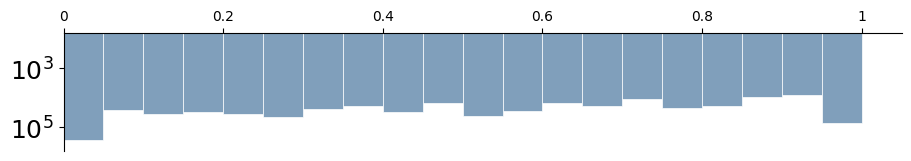

In [24]:
fig, axs = plt.subplots(figsize = (9,1.5), constrained_layout = True)

data = np.array(list(node_CateogoriesPercent.values()))[:, 0]
print(np.average(data), np.quantile(data, [0.25, 0.5, 0.75]))
sns.histplot(data, color='#034078', fill=True, alpha=.5, bins = 20, linewidth = 0.5, edgecolor = 'white')
plt.ylabel('')
plt.yscale('log')
plt.yticks(fontsize = 18)

axs.spines['right'].set_visible(False)
axs.spines['bottom'].set_visible(False)
axs.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1], ["0", "0.2", "0.4", "0.6", "0.8", "1"])

plt.yticks([10**3, 10**5], [r"$10^3$", r"$10^5$"])
plt.xlim(0, 1.05)
plt.ylim(10**1.8, 10**5.8)

axs.xaxis.tick_top()
plt.gca().invert_yaxis()

- fake

In [25]:
# Number of users involved
np.sum(np.array(list(node_CateogoriesPercent.values()))[:, 1] > 0)

237238

0.0838190329608072 [0.         0.         0.05882353]


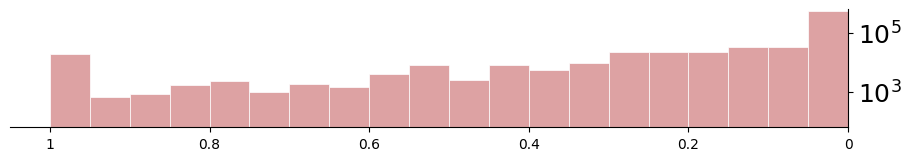

In [26]:
fig, axs = plt.subplots(figsize = (9,1.5), constrained_layout = True)

data = np.array(list(node_CateogoriesPercent.values()))[:, 1]
print(np.average(data), np.quantile(data, [0.25, 0.5, 0.75]))
sns.histplot(data, color='#bc4749', fill=True, alpha=.5, bins = 20, linewidth = 0.5, edgecolor = 'white')
plt.ylabel('')
plt.yscale('log')

axs.spines['left'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1], ["0", "0.2", "0.4", "0.6", "0.8", "1"])

plt.yticks([10**3, 10**5], [r"$10^3$", r"$10^5$"], fontsize = 18)
plt.xlim(0, 1.05)
plt.ylim(10**1.8, 10**5.8)

axs.yaxis.tick_right()
plt.gca().invert_xaxis()
#plt.axis('off')

- uncertain

In [27]:
# Number of users involved
np.sum(np.array(list(node_CateogoriesPercent.values()))[:, 2] > 0)

674234

0.5861420096918507 [0.30909091 0.6        1.        ]


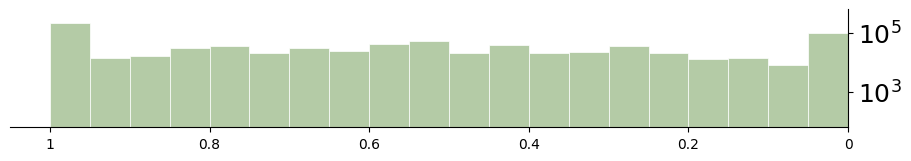

In [28]:
fig, axs = plt.subplots(figsize = (9,1.5), constrained_layout = True)

data = np.array(list(node_CateogoriesPercent.values()))[:, 2]
print(np.average(data), np.quantile(data, [0.25, 0.5, 0.75]))
sns.histplot(data, color='#6a994e', fill=True, alpha=.5, bins = 20, linewidth = 0.5, edgecolor = 'white')
plt.ylabel('')
plt.yscale('log')

axs.spines['left'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1], ["0", "0.2", "0.4", "0.6", "0.8", "1"])

plt.yticks([10**3, 10**5], [r"$10^3$", r"$10^5$"], fontsize = 18)
plt.xlim(0, 1.05)
plt.ylim(10**1.8, 10**5.8)

axs.yaxis.tick_right()
plt.gca().invert_xaxis()
#plt.axis('off')

## 3.2. Joint Distribution

In [29]:
xyz = np.array(list(node_CateogoriesPercent.values()))

In [30]:
bins_edges = [0] + [(0.5+i)/10 for i in range(10)] +[1]

In [37]:
nbins = 10
H, b = np.histogramdd((xyz[:, 0], xyz[:, 1]),
                      bins=(bins_edges, bins_edges), range=((0, 1), (0, 1)))
print(np.sum(H))

767553.0


In [38]:
interp_dict = {}
x1_list = np.arange(0,11)
for x1 in x1_list:
    x2_list = np.arange(0,11-x1)
    for x2 in x2_list:
        key = (x1, x2, 10-x1-x2)
        interp_dict[key] = H[(x1, x2)]
        interp_dict[key] = np.log10(H[(x1, x2)])

In [39]:
from matplotlib import colors 
import ternary

FS = 14
plt.rc('xtick', labelsize = FS)
plt.rc('ytick', labelsize = FS)

def TenaryPlot(tenary_dict, cmin, cmax, comps, title): 
    plt.rcParams['figure.dpi'] = 200
    plt.rcParams['figure.figsize'] = (9, 6)

    ## Boundary and Gridlines
    scale = 10
    Fig = plt.figure(); Fig1 = Fig.add_subplot(111)
    tax = ternary.TernaryAxesSubplot(ax=Fig1, scale = scale)
    
    #figure, tax =ternary.figure(scale=scale)
    c_min= cmin
    c_max= cmax

    # # Draw Boundary and Gridlines
    tax.boundary(linewidth=1.5)
    tax.gridlines(color="black", multiple=1)
    #tax.gridlines(color="blue", multiple=1, linewidth=0.5)
    # # Set Axis labels and Title
    fontsize = 16
    #tax.set_title(title, fontsize = fontsize)
    tax.left_axis_label(comps[2], fontsize=fontsize, offset=0.18, color = 'tab:green')
    tax.right_axis_label(comps[1], fontsize=fontsize, offset=0.20, color = 'tab:red')
    tax.bottom_axis_label(comps[0], fontsize=fontsize, offset=0.18, color = 'tab:blue')
    
    # # Set ticks
    scale = 10
    ticks = ['{0:.0%}'.format(i / float(scale)) for i in range(scale+1)]
    tax.ticks(ticks = ticks, axis='lbr', linewidth=1,
              multiple=1, offset=0.03, tick_formats="%0.1f", fontsize = 12)
    
    cb_kwargs = {"orientation" : "vertical", "norm": colors.LogNorm(vmin=cmin, vmax = cmax)}
    tax.heatmap(tenary_dict, vmin = np.log10(cmin), vmax = np.log10(cmax), cmap = 'inferno', style="h", cbarlabel = "User Count", cb_kwargs = cb_kwargs) 
    
    # # Remove default Matplotlib Axes
    tax.clear_matplotlib_ticks()
    tax.get_axes().axis('off')
    #tax.legend(loc='best')
    
    return Fig1

<AxesSubplot: >

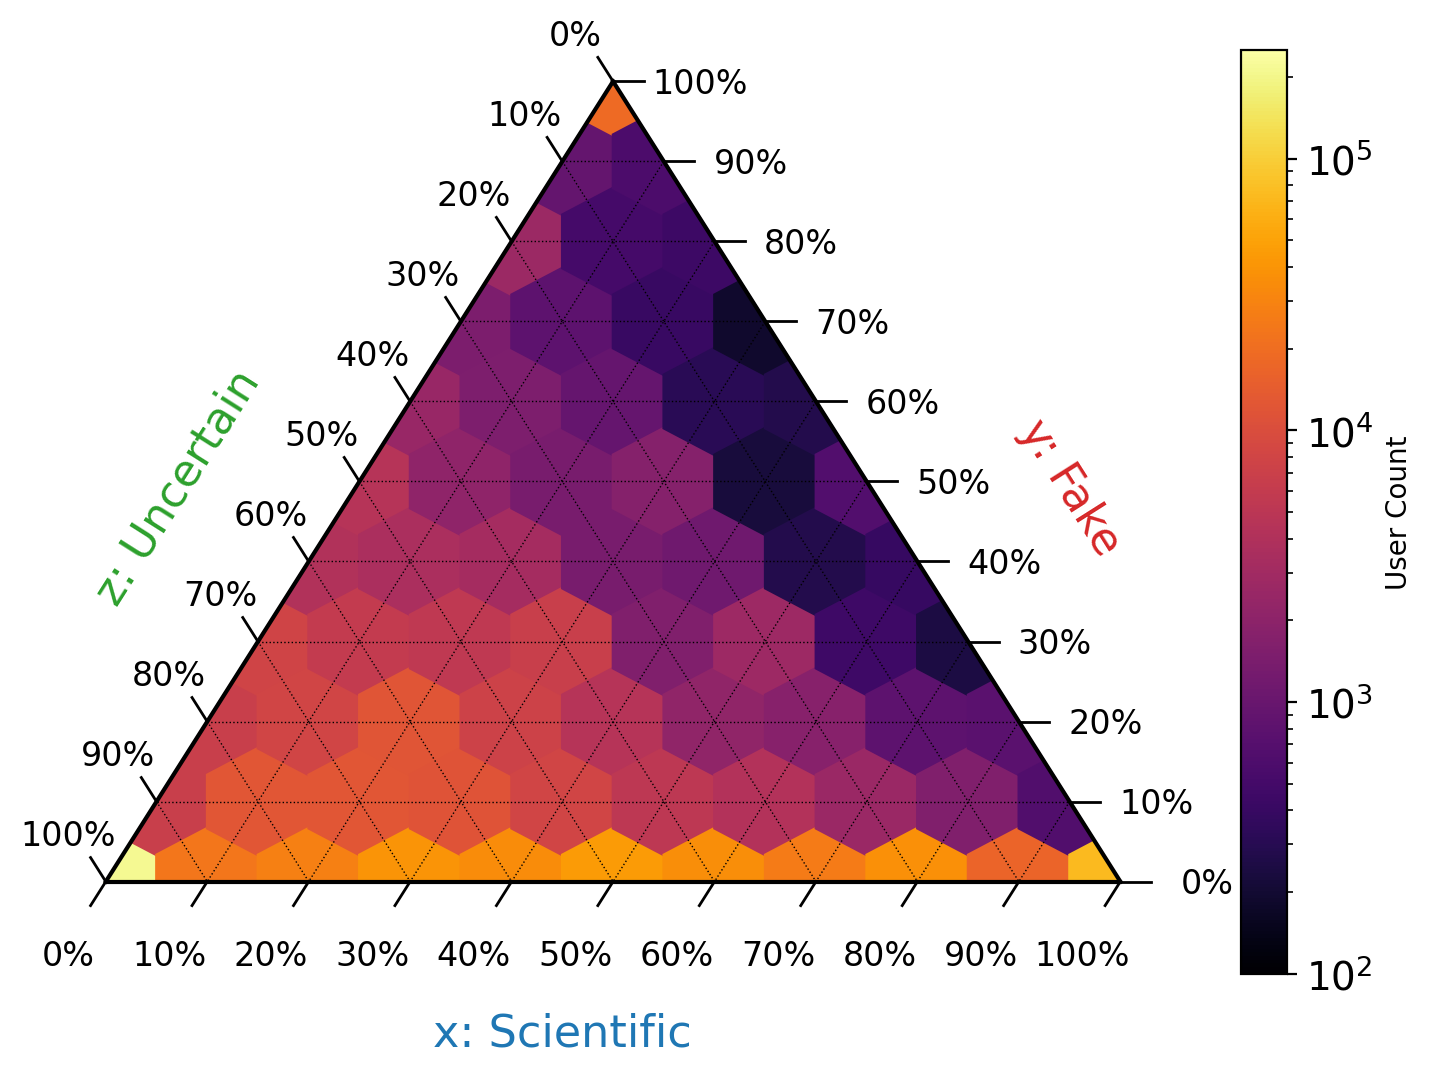

In [52]:
TenaryPlot(interp_dict, cmin = 10**2, cmax = 10**5.4, comps = ["x: Scientific","y: Fake","z: Uncertain"], title = "Info Sent")

## 3.3. Cutting Line

In [31]:
retweetCategory_sum = [np.sum(all_newsCategoriesGeneralised == i) for i in range(3)]

In [32]:
def cal_retweet_volume_percent(index, tendency_ratio):
    node_list = [node for node, percent in node_CateogoriesPercent.items() if percent[index] >= tendency_ratio]
    edge_list = list(set(list(G_filtered.out_edges(node_list)) + list(G_filtered.in_edges(node_list))))
    
    count = 0
    for edge in edge_list:
        news_arr = G_filtered.edges[edge]['newsCategoriesGeneralised']
        count += np.sum(news_arr == index)

    return count/retweetCategory_sum[index]

In [49]:
tendency_ratio_arr = np.array([0.01*i for i in range(101)])

In [53]:
st = time.time()

scientific_volume_percent = np.array([cal_retweet_volume_percent(0, ratio) for ratio in tendency_ratio_arr])

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')

Execution time: 20.240588629245757 mins


In [58]:
st = time.time()

fake_volume_percent = np.array([cal_retweet_volume_percent(1, ratio) for ratio in tendency_ratio_arr])

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')

Execution time: 5.690955015023549 mins


In [59]:
st = time.time()

uncertain_volume_percent = np.array([cal_retweet_volume_percent(2, ratio) for ratio in tendency_ratio_arr])

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')

Execution time: 29.965580944220225 mins


- Save results

In [60]:
results_arr = np.stack((scientific_volume_percent, fake_volume_percent, uncertain_volume_percent), axis = 1)

In [61]:
save_address = "Results/User_categories/Cutting_line_plot.pkl"
with open(save_address, 'wb') as pickle_file:
    pickle.dump(results_arr, pickle_file)

- Load results

In [33]:
save = "Results/User_categories/Cutting_line_plot.pkl"

with open(save, 'rb') as pickle_file:
    results_arr = pickle.load(pickle_file)

- Plot

In [203]:
colour_palette = {"scientific":"#2a9d8f", "fake":"#e76f51", "uncertain":"#e9c46a"}

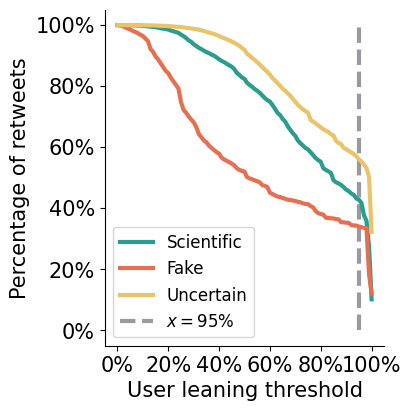

In [261]:
from matplotlib.ticker import PercentFormatter

tendency_ratio_arr = np.array([0.01*i for i in range(101)])

fig, axs = plt.subplots(figsize = (4, 4), constrained_layout = True)

plt.plot(tendency_ratio_arr, results_arr[:, 0], color = colour_palette["scientific"], label = "Scientific", linewidth = 3, zorder = 1)
plt.plot(tendency_ratio_arr, results_arr[:, 1], color = colour_palette["fake"], label = "Fake", linewidth = 3, zorder = 1)
plt.plot(tendency_ratio_arr, results_arr[:, 2], color = colour_palette["uncertain"], label = "Uncertain", linewidth = 3, zorder = 1)

plt.plot(np.ones(11)*0.95, np.arange(0, 1.1, 0.1), label = r"$x = 95\%$", color = '#999A9E', linewidth = 3, zorder = 0, linestyle = "dashed")

plt.xlabel('User leaning threshold', fontsize = 15)
plt.ylabel('Percentage of retweets', fontsize = 15)
plt.xticks(fontsize = 15); plt.yticks(fontsize = 15)
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
#plt.grid()
plt.legend(fontsize = 12)

axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)

fig.savefig('Figures/Fig2a.png', dpi=400, bbox_inches = 'tight')

In [139]:
cal_retweet_volume_percent(0, 0.95), cal_retweet_volume_percent(1, 0.95), cal_retweet_volume_percent(2, 0.95)

(0.4283057962584762, 0.3402477813306525, 0.5604402656045521)

## 3.4. Users of Extreme Leaning

In [80]:
scientificNodes_extreme = [node for node in list(G_filtered.nodes) if node_CateogoriesPercent[node][0] > 0.95]
fakeNodes_extreme = [node for node in list(G_filtered.nodes) if node_CateogoriesPercent[node][1] > 0.95]
uncertainNodes_extreme = [node for node in list(G_filtered.nodes) if node_CateogoriesPercent[node][2] > 0.95]

In [81]:
save_address = "Results/User_categories/Users_extreme.pkl"
with open(save_address, 'wb') as pickle_file: 
    pickle.dump([scientificNodes_extreme, fakeNodes_extreme, uncertainNodes_extreme], pickle_file)

In [84]:
len(scientificNodes_extreme), len(scientificNodes_extreme)/G_filtered.number_of_nodes()

(73048, 0.09516997523298065)

In [85]:
len(fakeNodes_extreme), len(fakeNodes_extreme)/G_filtered.number_of_nodes()

(19036, 0.024800893228220072)

In [86]:
len(uncertainNodes_extreme), len(uncertainNodes_extreme)/G_filtered.number_of_nodes()

(208806, 0.2720411489499748)

## 3.5. Persistent Users

In [219]:
def get_persistent_nodes(latest_start, earliest_end, nodes):
    
    persistent_nodes = []
    
    for node in nodes:
        if G_filtered.nodes[node]["timeStamps"][0] <= latest_start and G_filtered.nodes[node]["timeStamps"][-1] >= earliest_end:
            persistent_nodes.append(node)
        
    return persistent_nodes

In [214]:
days_in_month = [
    31,  # March
    30,  # April
    31,  # May
    30,  # June
    31,  # July
    31,  # August
    30,  # September
    31,  # October
    30,  # November
    31,   # December
    31,  # January
    28,  # February (29 in leap years)
]

In [215]:
monthly_separators = []
for i in range(12*3):
    if i == 0:
        monthly_separators.append(1584482894)
    else:
        monthly_separators.append((60*60*24) * days_in_month[i%12] + monthly_separators[-1])

In [216]:
latest_start = monthly_separators[3]; earliest_end = monthly_separators[-4]

In [220]:
scientificNodes_persistent = get_persistent_nodes(latest_start, earliest_end, scientificNodes_extreme)
len(scientificNodes_persistent), len(scientificNodes_persistent)/len(scientificNodes_extreme)

(8840, 0.12101631803745483)

In [221]:
fakeNodes_persistent = get_persistent_nodes(latest_start, earliest_end, fakeNodes_extreme)
len(fakeNodes_persistent), len(fakeNodes_persistent)/len(fakeNodes_extreme)

(1399, 0.07349233032149612)

In [222]:
uncertainNodes_persistent = get_persistent_nodes(latest_start, earliest_end, uncertainNodes_extreme)
len(uncertainNodes_persistent), len(uncertainNodes_persistent)/len(uncertainNodes_extreme)

(19254, 0.09220999396569064)

## 4. Retweets of Extremely Aligned Users

In [111]:
def get_temporal_RetweetCountSum(nodes, time_separators):
    
    interval_list = list(zip(time_separators[:-1], time_separators[1:]))
    temporal_retweet_count = np.zeros(len(interval_list))
    
    in_edges = list(G_filtered.in_edges(nodes))
    out_edges = list(G_filtered.out_edges(nodes))
    
    timestamps = []
    for edge in list(set(in_edges + out_edges)):
        timestamps += list(np.array(G_filtered.edges[edge]["timeStamps"]))
    timestamps = np.array(timestamps)
    
    for i in range(len(interval_list)):
        bool_arr = np.logical_and(timestamps >= interval_list[i][0], timestamps <= interval_list[i][1])
        temporal_retweet_count[i] += np.sum(bool_arr) 
    
    return temporal_retweet_count

In [112]:
separators = [1584482894 + (i+1) * (60*60*24) for i in range(1062)] #daily

In [113]:
st = time.time()

scientificNodes_retweetCountSum = get_temporal_RetweetCountSum(scientificNodes_extreme, separators)

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Execution time: 0.24692436456680297 mins
RAM memory % used: 65.5
RAM Used (GB): 260.903559168


In [115]:
st = time.time()

fakeNodes_retweetCountSum = get_temporal_RetweetCountSum(fakeNodes_extreme, separators)

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Execution time: 0.029078344504038494 mins
RAM memory % used: 65.5
RAM Used (GB): 260.93197312


In [116]:
st = time.time()

uncertainNodes_retweetCountSum = get_temporal_RetweetCountSum(uncertainNodes_extreme, separators)

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Execution time: 0.5849478602409363 mins
RAM memory % used: 65.5
RAM Used (GB): 260.935970816


In [117]:
save_address = "Results/User_categories/Users_extreme_retweets.pkl"
with open(save_address, 'wb') as pickle_file:
    pickle.dump([scientificNodes_retweetCountSum, fakeNodes_retweetCountSum, uncertainNodes_retweetCountSum], pickle_file)

In [201]:
colour_palette = {"scientific":"#2a9d8f", "fake":"#e76f51", "uncertain":"#e9c46a"}

In [281]:
index = [i*91 for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]] + [91*11 + 59]
x_tick = ["Mar 2020", "Jun 2020", "Sep 2020", "Dec 2020", "Mar 2021", "Jun 2021", "Sep 2021", "Dec 2021", "Mar 2022", "Jun 2022", "Sep 2022", "Dec 2022", "Feb 2023"]

In [282]:
len(index), len(x_tick)

(13, 13)

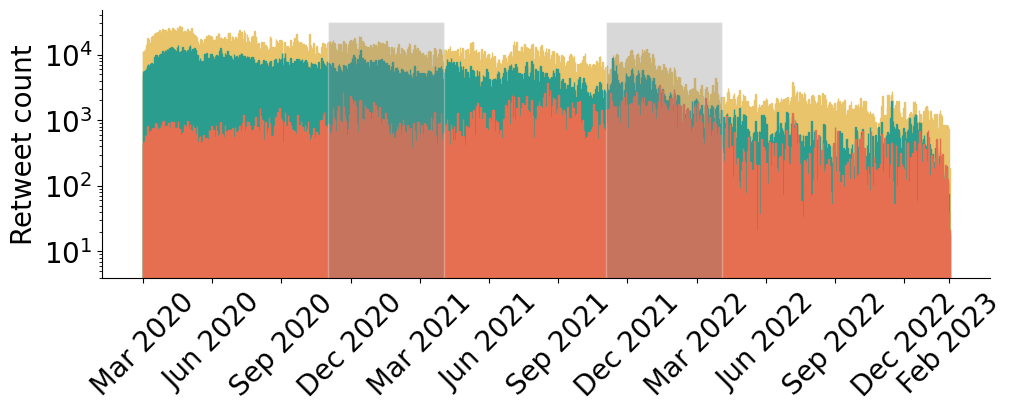

In [298]:
fig, axs = plt.subplots(figsize = (10,4), constrained_layout = True)

x = np.arange(0, len(separators)-1, 1)
plt.bar(x, uncertainNodes_retweetCountSum, color = colour_palette["uncertain"], edgecolor = colour_palette["uncertain"], linewidth = 1, alpha = 1)
plt.bar(x, scientificNodes_retweetCountSum, color = colour_palette["scientific"], edgecolor = colour_palette["scientific"], linewidth = 1, alpha = 1)
plt.bar(x, fakeNodes_retweetCountSum, color = colour_palette["fake"], edgecolor = colour_palette["fake"], linewidth = 1, alpha = 1)
plt.yscale('log')

index = [i*91 for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]] + [91*11 + 59]
x_tick = ["Mar 2020", "Jun 2020", "Sep 2020", "Dec 2020", "Mar 2021", "Jun 2021", "Sep 2021", "Dec 2021", "Mar 2022", "Jun 2022", "Sep 2022", "Dec 2022", "Feb 2023"]
plt.xticks(index, x_tick, fontsize = 20, rotation = 45) 
plt.yticks(fontsize = 20)
plt.ylabel('Retweet count', fontsize = 20)

axs.spines['right'].set_visible(False); axs.spines['top'].set_visible(False)

plt.fill_between([214+30, 365 + 31], 0, 10**4.5, alpha = 0.3, color = 'grey', edgecolor = 'white')
plt.fill_between([214+30 + 365, 365 + 31 +365], 0, 10**4.5, alpha = 0.3, color = 'grey', edgecolor = 'white')

fig.savefig('Figures/Fig2b.png', dpi=400, bbox_inches = 'tight')

# 5. Followers of Extremely Aligned Users

In [164]:
def get_temporal_followerCountSum(nodes, time_separators):
    
    temporal_follower_count = np.zeros(len(time_separators))
    
    for i in range(len(time_separators)):
        for node in nodes:
            bool_arr = (np.array(G_filtered.nodes[node]['timeStamps']) <= time_separators[i])
            if np.sum(bool_arr) > 0: 
                temporal_follower_count[i] += np.array(G_filtered.nodes[node]["followers"])[bool_arr][-1]
    
    return temporal_follower_count

In [165]:
days_in_month = [
    31,  # March
    30,  # April
    31,  # May
    30,  # June
    31,  # July
    31,  # August
    30,  # September
    31,  # October
    30,  # November
    31,   # December
    31,  # January
    28,  # February (29 in leap years)
]

In [166]:
monthly_separators = []
for i in range(12*3):
    if i == 0:
        monthly_separators.append(1584482894)
    else:
        monthly_separators.append((60*60*24) * days_in_month[i%12] + monthly_separators[-1])

In [227]:
st = time.time()

scientificNodes_followerCountSum = get_temporal_followerCountSum(scientificNodes_persistent, monthly_separators[3:-3])

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Execution time: 0.06696945031483968 mins
RAM memory % used: 66.5
RAM Used (GB): 265.486782464


In [247]:
st = time.time()

fakeNodes_followerCountSum = get_temporal_followerCountSum(fakeNodes_persistent, monthly_separators[3:-3])

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Execution time: 0.010680858294169109 mins
RAM memory % used: 66.5
RAM Used (GB): 265.455161344


In [248]:
st = time.time()

uncertainNodes_followerCountSum = get_temporal_followerCountSum(uncertainNodes_persistent, monthly_separators[3:-3])

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Execution time: 0.13790402015050252 mins
RAM memory % used: 66.5
RAM Used (GB): 265.457528832


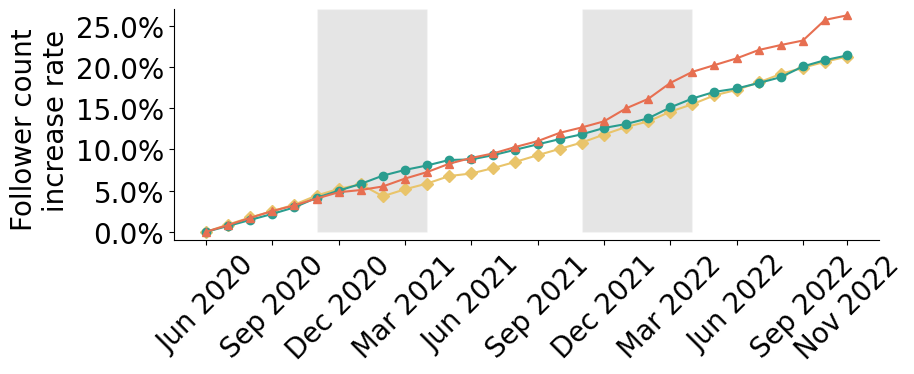

In [299]:
fig, axs = plt.subplots(figsize = (9.1,3))

x = np.arange(1, len(monthly_separators), 1)
plt.plot(x[2:-3], uncertainNodes_followerCountSum/uncertainNodes_followerCountSum[0] - 1, '-D', c = colour_palette["uncertain"])
plt.plot(x[2:-3], scientificNodes_followerCountSum/scientificNodes_followerCountSum[0] - 1, '-o', c = colour_palette["scientific"])
plt.plot(x[2:-3], fakeNodes_followerCountSum/fakeNodes_followerCountSum[0] - 1, '-^', c = colour_palette["fake"])

x_time = ["Jun 2020", "Sep 2020", "Dec 2020", "Mar 2021", "Jun 2021", "Sep 2021", "Dec 2021", "Mar 2022", "Jun 2022", "Sep 2022", "Nov 2022"]
x_tick = [i*3 for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]] + [32]
plt.xticks(x_tick, x_time, rotation = 45, fontsize = 20)
plt.yticks(fontsize = 20)

plt.ylabel('Follower count \n increase rate', fontsize = 20)
axs.spines['right'].set_visible(False); axs.spines['top'].set_visible(False)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.ylim(-0.01, 0.27)

plt.fill_between([8, 13], 0, 0.27, alpha = 0.2, color = 'grey', edgecolor = 'white')
plt.fill_between([20, 25], 0, 0.27, alpha = 0.2, color = 'grey', edgecolor = 'white')

fig.savefig('Figures/Fig2c.png', dpi=400, bbox_inches = 'tight')